In [15]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pylab as pl
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
os.system(os.getenv("PUIDATA") + "/MTA_Fare.npy")

32256

In [21]:
mtaRides = np.load(os.getenv("PUIDATA") + "/MTA_Fare.npy")
#(stations, ticket type, number of weeks)
mtaRides.shape

(600, 23, 194)

In [22]:
#replace -1 values with Nan values, must change type to 'float' first
mtaRides = mtaRides.astype('float')
mtaRides[mtaRides == -1] = 'NaN'

mtaRides

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

## Task 1

In [30]:
#create an interval for 194 weeks
weekinterval = pd.date_range('05/21/2010', periods = 194, freq = 'W')

In [117]:
#sum for all station, mean, and standard deviation
mta_allstationsum = np.nansum(mtaRides, axis = 1)
mta_allstationmean = np.nanmean(mtaRides, axis = 1)
mta_allstationsd = np.nanstd(mtaRides, axis = 1)

#sum of all ride types, mean, and standard deviation
mta_allridesum = np.nansum(mtaRides, axis = 0)
mta_allridesmean = np.nanmean(mtaRides, axis = 0)
mta_allridessd = np.nanstd(mtaRides, axis = 0)

#sum of riders and stations of all 194 weeks
ridesbyweek = np.nansum(mta_allstationsum, axis = 0)


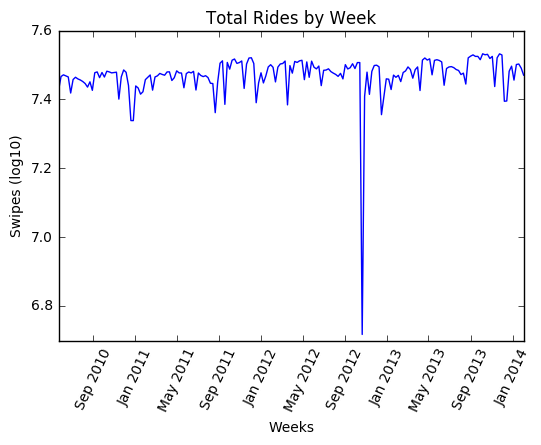

In [59]:
pl.plot(weekinterval, np.log10(ridesbyweek))
pl.title('Total Rides by Week')
pl.xticks(rotation = '65')
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10)")


### Figure 1. Total of MTA swipes for all fare types at all 600 stations by week
#### Weekly data starting from 05/21/2010 through 2/21/2014

In [56]:
#calculating threshold to identify event >3-sigma
print ("mean swipes by week {:.2f}".format(np.nanmean(ridesbyweek)))
print ("stdev swipes by week {:.2f}".format(np.nanstd(ridesbyweek)))
thresholds = [np.nanmean(ridesbyweek) + 3 * np.nanstd(ridesbyweek), 
              np.nanmean(ridesbyweek) - 3 * np.nanstd(ridesbyweek)]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(weekinterval))

mean swipes by week 29781349.87
stdev swipes by week 2983960.42
3-sigma thresholds 38733231.14 20829468.61
earliest datapoint 2010-05-23 00:00:00


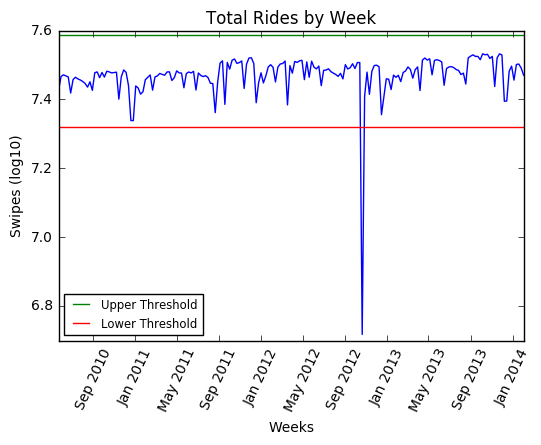

In [77]:
pl.plot(weekinterval, np.log10(ridesbyweek))
#plot the threshold values of + and - 3
pl.plot((min(weekinterval), max(weekinterval)),
        (np.log10(thresholds[0]), np.log10(thresholds[0])), label = 'Upper Threshold')
pl.plot((min(weekinterval), max(weekinterval)),
        (np.log10(thresholds[1]),np.log10(thresholds[1])), label = 'Lower Threshold')
pl.title('Total Rides by Week')
pl.xticks(rotation = '65')
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10)")
pl.legend(loc = 'best', fontsize = 'small')


### Figure 2. Total of MTA swipes for all fare types at all 600 stations by week
#### Weekly data starting from 05/21/2010 through 2/21/2014. Threshold lines identify event detection for a greater than 3 sigma change

In [81]:
#to find the week that drops below the -3 threshold
print (weekinterval[np.where(ridesbyweek < thresholds[1])])

DatetimeIndex(['2012-10-21'], dtype='datetime64[ns]', freq=None)


### The event that caused the change in ridership is related to Hurricane Sandy. 
(http://www.huffingtonpost.com/2012/10/28/mta-shutdown-hurricane-sandy-subway-cuomo_n_2034337.html)

## Task 2

In [123]:
#transpose array for all ride types to plot against week intervals
sum_allrides = mta_allridesum.transpose()
sum_allrides.shape

(194, 23)

In [134]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


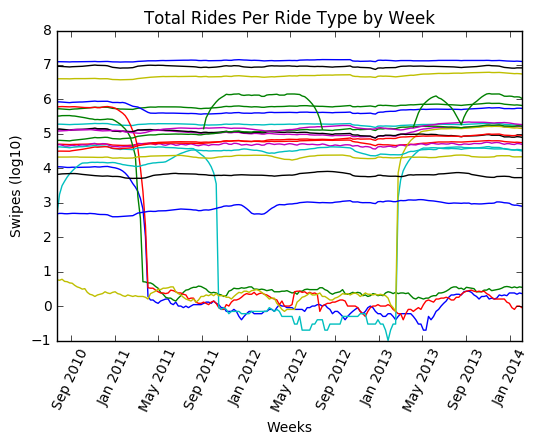

In [135]:
pl.plot(weekinterval, np.log10(pd.stats.moments.rolling_mean(sum_allrides, 10)))
pl.title('Total Rides Per Ride Type by Week')
pl.xticks(rotation = '65')
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10)")

### Figure 3. Total of Rides Per Ride Type by Week
#### Weekly data starting from 05/21/2010 through 2/21/2014. Representative of the 23 different MTA fare card types